<a href="https://colab.research.google.com/github/rachit6105/EMG-Controlled-Shooting-Game/blob/main/Week_2_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMG Signal Processing Assignment

## Setup
    Import necessary libraries: numpy, scipy, matplotlib.

## Part 1: Signal Filtering

    Task: Implement a Butterworth filter to remove high-frequency noise from the EMG signal.
    Task: Compare the frequency response of the original and filtered signals using a frequency plot.

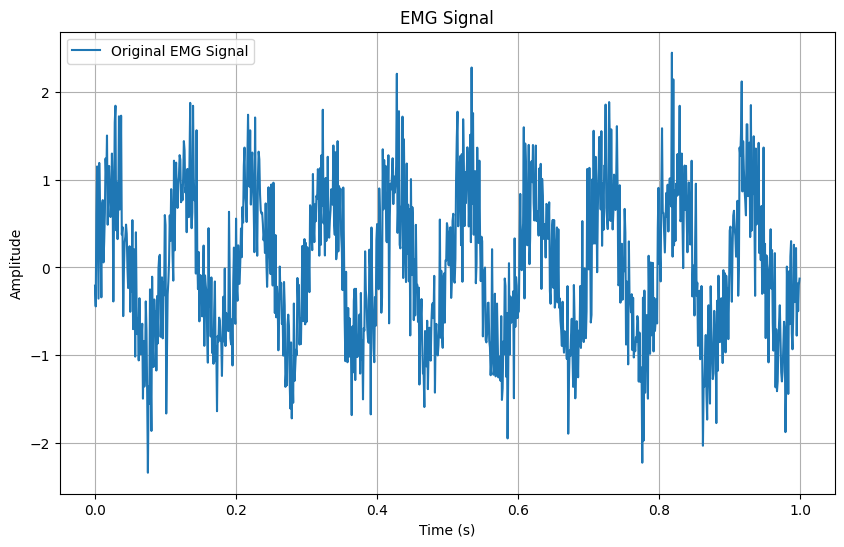

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate example EMG signal with noise
fs = 1000  # Sampling frequency (Hz)
t = np.arange(0, 1, 1/fs)  # Time vector (1 second)
emg_signal = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Plot original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
#Implement Butterworth filter or any other best suited filter.
def butter_lowpass_filter(data, cutoff, fs, order):
  nyq = 0.5 * fs
  normal_cutoff = cutoff / nyq
  # Get the filter coefficients
  b, a = butter(order, normal_cutoff, btype='low', analog=False)
  y = filtfilt(b, a, data)
  return y


In [3]:
#Compare the frequency response of the original and filtered signals using a frequency plot.
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go
# Filter requirements.
T = 5.0         # Sample Period
fs = 50.0       # sample rate, Hz
cutoff = 1.5
order = 2
y = butter_lowpass_filter(emg_signal, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = emg_signal,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

## Part 2: Peak Detection

    Task: Utilize scipy.signal.find_peaks to detect peaks in the filtered EMG signal.
    Question: What parameters can be adjusted in find_peaks function to improve peak detection accuracy?
    Task: Plot the original signal with markers indicating the detected peaks.

In [5]:
from scipy.signal import find_peaks,peak_widths
peaks, _ = find_peaks(y, distance=90)
# print(peaks)
# a scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = emg_signal,
            line =  dict(shape =  'spline' ),
            name = 'og signal'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
for distance in peaks:
    fig.add_trace(go.Scatter(x=[distance], y=[y[distance]], mode='markers', marker=dict(color='red', size=10),
                             name=f'Marker at {distance}'))
fig.show()

Answer the Question here:

In [ ]:
#distance can be reduced as it checks peaks in every given distance also we can play with threshhold value

## Part 3: Peak Start and End Time Detection

    Task: Develop a method to determine the start and end times of each detected peak.
    Question: Why is it necessary to identify the precise onset and offset times of muscle activation in EMG signals?
    Task: Visualize the original signal with annotated start and end times of peaks.

In [ ]:
threshold = 0
cstarts = []
cstops = []
for i in range(1, len(y)):
    if y[i-1] < threshold and y[i] >= threshold:
        cstarts.append(i)
    if y[i-1] >= threshold and y[i] < threshold:
        cstops.append(i)

starts=[]
stops=[]
for n in range(0, len(cstarts)):
    starttime = cstarts[n]/1000
    starts.append(starttime)

for n in range(0, len(cstops)):
    stoptime = cstops[n]/1000
    stops.append(stoptime)

fig = go.Figure()

# Add trace for the signal
fig.add_trace(go.Scatter(x=t, y=y, mode='lines', line=dict(color='blue', width=2.0), name='Signal'))

# Add vertical dashed lines for contraction start and stop times
for start in starts:
    fig.add_shape(type='line', x0=start, y0=min(y), x1=start, y1=max(y),
                  line=dict(color='black', width=2.0, dash='dash'))
for stop in stops:
    fig.add_shape(type='line', x0=stop, y0=min(y), x1=stop, y1=max(y),
                  line=dict(color='black', width=2.0, dash='dash'))

# Update layout
fig.update_layout(
    xaxis_title='Time (s)',
    yaxis_title='Voltage ($\mu$V)',
    title='Contraction Start and Stop Times'
)


# Show the plot
fig.show()


Answer the Question here:

In [6]:
#For our project we have to when a particular action is taking place for example shooting or moving failure in doing so will result in our own player getting killed so the better our accuracy is the better we ll be able to be one with the game


## Part 4: Envelope Extraction

    Task: Implement the Hilbert transform to extract the envelope of the filtered EMG signal.
    Question: What information does the envelope of an EMG signal provide about muscle activity?
    Task: Plot the original signal overlaid with its envelope.

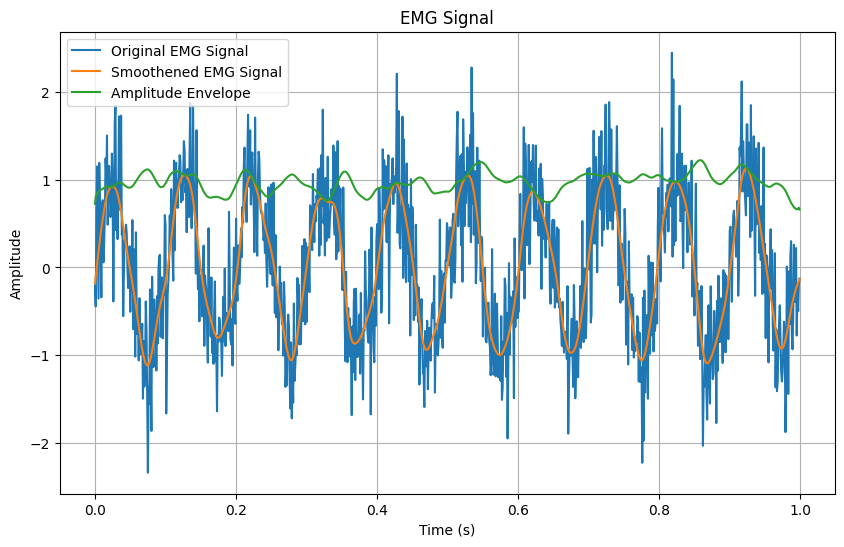

In [18]:
from scipy.signal import hilbert

analytic_signal = hilbert(y)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
plt.figure(figsize=(10, 6))
plt.plot(t, emg_signal, label='Original EMG Signal')
plt.plot(t, y, label='Smoothened EMG Signal')
plt.plot(t, amplitude_envelope, label='Amplitude Envelope')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EMG Signal')
plt.legend()
plt.grid(True)
plt.show()

Answer the Question here:

In [ ]:
#In signal processing, an envelope typically refers to a curve that outlines the maximum or minimum peaks of a signal's magnitude over time.

## Part 5: Time Domain Analysis

    Task: Calculate key metrics such as mean, variance, and RMS (Root Mean Square) of the cleaned EMG signal.
    Task: Interpret the calculated metrics in the context of muscle activity and signal characteristics.

In [21]:

mean = np.mean(y)
variance = np.var(y)

print("Mean:", mean)
print("Variance:", variance)

# Calculate RMS
rms = np.sqrt(np.mean(y**2))

print("RMS:", rms)


Mean: 0.017903326482095725
Variance: 0.4735342039388254
RMS: 0.6883710721972197


Interpretation:
- Mean: A higher mean value may suggest increased muscle activation, while a lower mean value may indicate reduced muscle activity.
- Variance: Higher variance may indicate greater variability in muscle activation, possibly due to changes in force production or signal noise.
- RMS: A higher RMS value corresponds to stronger muscle contractions, while a lower RMS value suggests weaker muscle activity.
These interpretations can provide insights into muscle performance, fatigue, and overall neuromuscular function.

## Part 6: Frequency Domain Analysis

    Task: Apply the Fast Fourier Transform (FFT) to analyze the frequency components of the cleaned EMG signal.
    Task: Plot the frequency spectrum of the EMG signal and identify prominent frequency peaks.

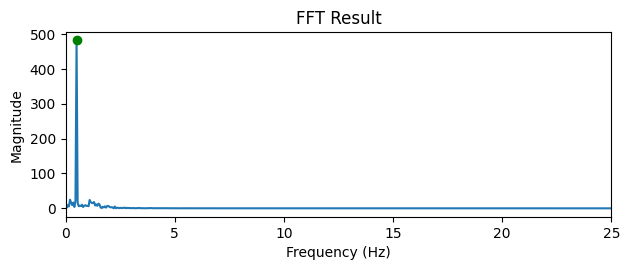

In [20]:
N = len(y)  # Length of the signal
freq = np.fft.rfftfreq(N, d=1/fs)  # Frequency bins for the FFT
fft_result = np.abs(np.fft.rfft(y))  # Magnitude of the FFT
peaks, _ = find_peaks(fft_result,threshold=50)

# Plot the FFT result
plt.subplot(2, 1, 2)
plt.plot(freq, fft_result)

plt.plot(freq[peaks], fft_result[peaks], 'go', label='Peaks')

plt.title('FFT Result')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs/2)  # Display only positive frequencies
plt.tight_layout()
plt.show()